# 👤Customer Segmentation Visualization & Advanced Analysis
## Internship Project – Saiket Systems

### Executive Summary
This project analyzes customer churn patterns using segmentation and exploratory analysis to identify high-risk customers and recommend retention strategies.

## 🧩 TASK 1: Understand the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Load dataset
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Observation
- The dataset contains customer demographic, service usage, and billing information.
- The target variable `Churn` indicates whether a customer has left the service.

In [4]:
print(f"No. of Rows: {df.shape[0]} \nNo. of Columns: {df.shape[1]}")

No. of Rows: 7043 
No. of Columns: 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observation
- Most columns are categorical.
- `TotalCharges` requires conversion to numeric for analysis.

In [6]:
#check for null values
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check for duplicated values
df.duplicated().sum()

np.int64(0)

In [8]:
#check for duplicated values for customerID
df['customerID'].duplicated().sum()

np.int64(0)

In [9]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## 🧩 TASK 2: Data Cleaning

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [11]:
# change data type
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [13]:
# Fill missing TotalCharges with median
df['totalcharges']= df['totalcharges'].fillna(df['totalcharges'].median())

In [14]:
#Changing SeniorCitizen values from 0,1 to yes & no
def convert_value(value):
    if value == 1 :
        return "yes"
    else :
        return "no"

df['seniorcitizen']=df['seniorcitizen'].apply(convert_value)

In [15]:
df['paymentmethod'] = df['paymentmethod'].replace({
    'Bank transfer (automatic)': 'Bank transfer',
    'Credit card (automatic)': 'Credit card'
})

In [16]:
df.head(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card,89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer,56.15,3487.95,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


## 🧩 TASK 3: Exploratory Data Analysis (EDA)

In [18]:
df.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


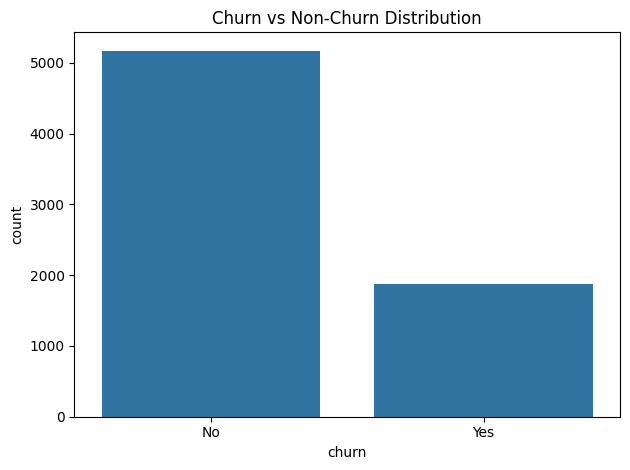

In [19]:
#Churn Distribution
sns.countplot(x='churn', data=df)
plt.title("Churn vs Non-Churn Distribution")
plt.tight_layout()
plt.savefig("images/01_Churn_vs_Non-Churn_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **Churn Benchmark:** A 26.5% churn rate indicates a high-risk "leaky bucket," where 1 in 4 customers leave the service.

 - **Revenue Risk:** High turnover necessitates a shift from aggressive acquisition to targeted retention strategies to protect long-term LTV (Life Time Value).

 - **Data Imbalance:** The 3:1 ratio between stayers and leavers requires weighted modeling techniques to accurately predict and prevent future churn.

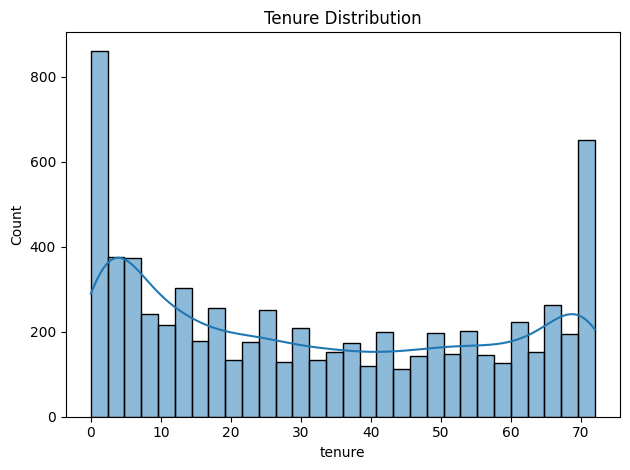

In [20]:
#Tenure Distribution
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.tight_layout()
plt.savefig("images/02_Tenure_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**


 - **High Early Attrition:** A significant spike in the 0–5 month range indicates a high "infant mortality" rate where new customers leave shortly after onboarding.

 - **Customer Loyalty:** The secondary spike at 70+ months represents a loyal "anchor" segment with high lifetime value (LTV) and low churn risk.

 - **Actionable Gap:** The "U-shaped" distribution suggests that if a customer survives the first year, their probability of long-term retention increases drastically. Focus should be on first-year engagement programs.

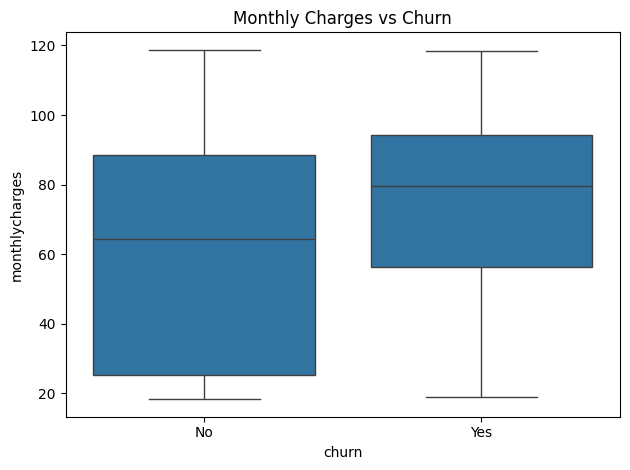

In [21]:
#Monthly Charges Boxplot
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.savefig("images/03_Monthly_Charges_vs_Churn.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **Higher Cost, Higher Risk:** Churn density peaks significantly in the $70–$100 range. Customers paying premium prices are far more likely to leave than those on budget plans (<$30).

 - **Value Gap:** The high churn in the upper price bracket suggests a perceived lack of value. Premium customers likely feel the service quality or benefits do not justify the higher monthly expense.

 - **Targeted Retention:** Implementing loyalty discounts or service bundles specifically for the $70+ segment could drastically reduce overall churn.

## 🧩 TASK 4: Customer Segmentation Visualization

In [22]:
#Create Tenure Categories
bins = [0, 12, 36, 72]
labels = ['0-12 Months', '13-36 Months', '37+ Months']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

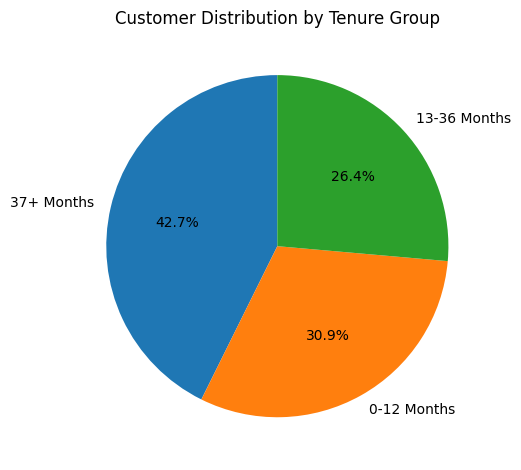

In [23]:
#Pie Chart (Tenure Distribution)
tenure_counts = df['tenure_group'].value_counts()

plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Distribution by Tenure Group")
plt.tight_layout()
plt.savefig("images/04_Customer_Distribution_by_Tenure_Group.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **New Customer Fragility:** The highest churn rate is concentrated in the 0–12 month (Short-term) group. This confirms that the first year is the "danger zone" for customer retention.

 - **Loyalty Lock-in:** Churn decreases progressively as tenure increases. Customers in the 5yr+ (Long-term) group show the highest stability, suggesting that brand loyalty and high switching costs act as powerful retention factors.

 - **Intervention Window:** The most critical window for engagement is the first 12 months. Transitioning customers from "Short-term" to "Mid-term" (1–3 years) significantly reduces the probability of loss.

C:\Users\UNBOX\AppData\Local\Temp\ipykernel_1424\827953539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges = df.groupby('tenure_group')['monthlycharges'].mean()


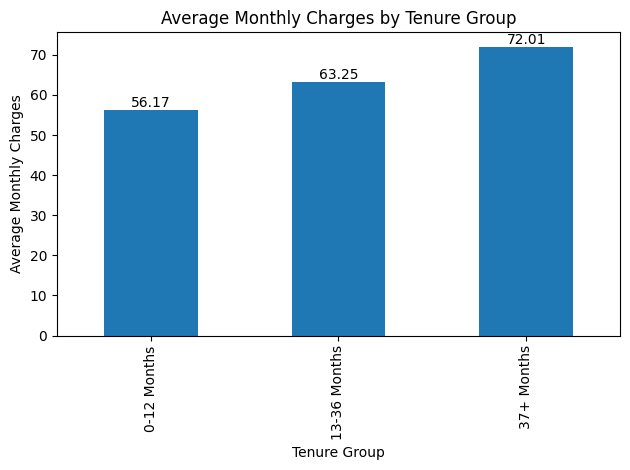

In [24]:
#Clustered Bar Chart (Monthly Charges)
avg_charges = df.groupby('tenure_group')['monthlycharges'].mean()

avg_charges.plot(kind='bar')
plt.title("Average Monthly Charges by Tenure Group")
plt.ylabel("Average Monthly Charges")
plt.xlabel("Tenure Group")

for index, value in enumerate(avg_charges):
    plt.text(index, value, round(value,2), ha='center', va='bottom')

plt.tight_layout()
plt.savefig("images/05_Average_Monthly_Charges_by_Tenure_Group.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

- **Upselling Success:** Average monthly charges increase as tenure grows. This indicates that long-term customers are likely using more premium services or add-on features over time.

- **Price Sensitivity:** The "Long-term (5yr+)" group pays the highest monthly average, yet we know they churn the least. This suggests that value-to-price satisfaction is high for veteran customers despite the cost.

- **Acquisition Pricing:** The "Short-term" group has the lowest average charges, likely due to entry-level promotional pricing. The challenge is maintaining engagement when these initial discounts expire and prices rise.

## 🧩 TASK 5: Advanced Analysis

C:\Users\UNBOX\AppData\Local\Temp\ipykernel_1424\3006988709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tenure = df.groupby('tenure_group')['churn'].value_counts(normalize=True).unstack()


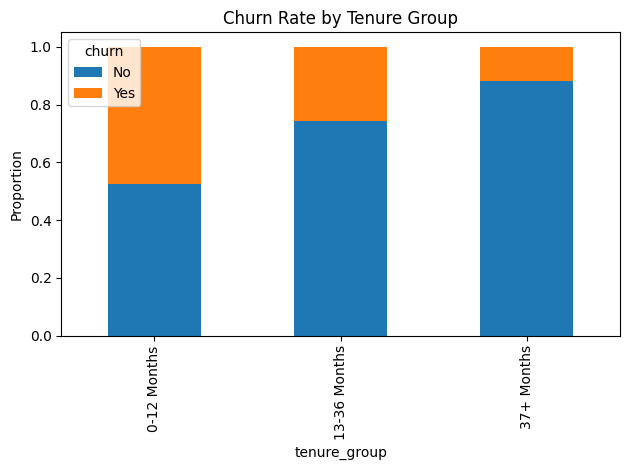

In [25]:
#Churn Rate by Tenure Group
churn_tenure = df.groupby('tenure_group')['churn'].value_counts(normalize=True).unstack()

churn_tenure.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig("images/06_Churn_Rate_by_Tenure_Group.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **Critical Vulnerability:** The Short-term (0–12 months) group shows the highest churn percentage. This indicates a failure to demonstrate long-term value during the initial onboarding phase.

 - **Retention Cliff:** There is a sharp decline in churn rates as customers move into the Mid-term (1–3 years) group, suggesting that if a customer stays past the first year, they are significantly more likely to remain loyal.

 - **Profitability Anchor:** The Long-term (5yr+) group has a negligible churn rate. These customers are the most stable revenue assets and should be prioritized for "thank you" loyalty rewards rather than aggressive sales tactics.

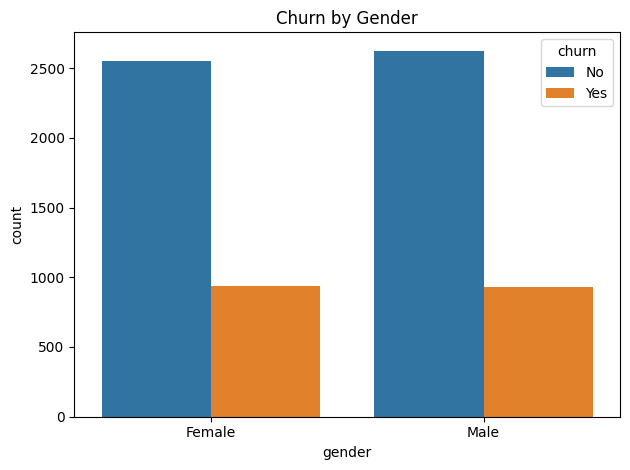

In [26]:
#Churn by Gender
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Churn by Gender")
plt.tight_layout()
plt.savefig("images/07_Churn_by_Gender.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **Gender Neutrality:** Churn rates are nearly identical between Male and Female customers. This suggests that gender is not a primary driver of customer attrition for this service.

 - **Uniform Experience:** The service delivery, pricing, and marketing appear to resonate (or fail) equally across genders, indicating that gender-specific retention campaigns may not yield a high ROI.

 - **Marketing Strategy:** Since the behavior is balanced, brand messaging should remain gender-neutral, focusing instead on high-impact variables like contract type or service quality.

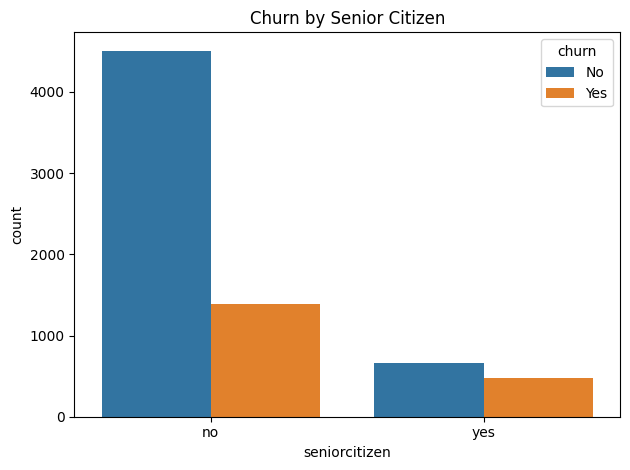

In [27]:
#Churn by Senior Citizen
sns.countplot(x='seniorcitizen', hue='churn', data=df)
plt.title("Churn by Senior Citizen")
plt.tight_layout()
plt.savefig("images/08_Churn by Senior Citizen.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **Higher Risk Profile:** Senior citizens exhibit a significantly higher churn rate compared to younger demographics. Despite being a smaller portion of the total customer base, their attrition is disproportionately high.

 - **Digital Friction:** The higher churn in this segment often correlates with complex billing, lack of specialized support, or the high adoption of Fiber Optic services (which are more expensive and prone to technical issues).

 - **Accessibility Opportunity:** There is a major opportunity to reduce churn by offering tailored "Senior" plans that prioritize simplified customer support and fixed, predictable pricing.

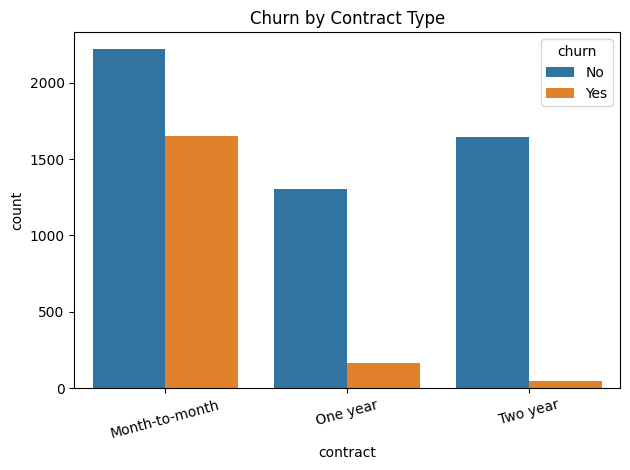

In [28]:
#Churn by Contract Type
sns.countplot(x='contract', hue='churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("images/09_Churn_by_Contract_Type.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

 - **Month-to-Month Fragility:** This segment has the highest churn rate. The lack of a long-term commitment makes these customers highly reactive to price changes or competitor offers.

 - **Contractual "Lock-in" Effect:** Churn drops drastically for One-year contracts and becomes almost negligible for Two-year contracts. Stability is directly proportional to the length of the commitment.

 - **Strategic Pivot:** The primary business goal should be contract migration. Incentivizing Month-to-Month users to switch to even a 1-year plan—via small discounts or value-adds—will provide the single biggest boost to overall retention.

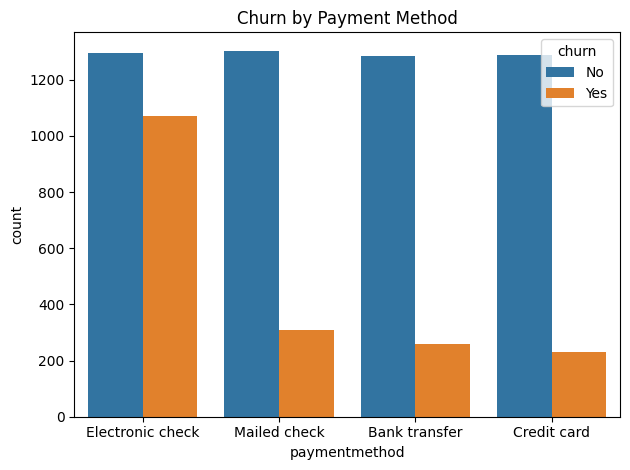

In [29]:
#Churn by Payment Method
sns.countplot(x='paymentmethod', hue='churn', data=df)
plt.title("Churn by Payment Method")
plt.tight_layout()
plt.savefig("images/10_Churn_by_Payment_Method.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

- **Electronic Check Vulnerability:** Customers using Electronic Checks exhibit a disproportionately higher churn rate compared to all other methods. This is often linked to manual payment friction or "bill shock" since the process isn't automated.

- **The "Auto-Pay" Buffer:** Customers on Credit Card or Bank Transfer (Automatic) show the lowest churn. Automation creates a "set-it-and-forget-it" behavior, significantly increasing customer "stickiness" and reducing missed payment service cuts.

- **Operational Transition:** Moving customers from manual billing (Electronic/Mailed Check) to Automatic Payment methods is a high-leverage strategy to stabilize recurring revenue and reduce voluntary churn.

### Key Findings
- Month-to-month contract customers show the highest churn rate.
- Customers using electronic check payments are more likely to churn.
- Long-term contracts significantly reduce churn probability.

## 🏁 Final Conclusion : Customer Retention Strategy

Based on the comprehensive analysis of the Telco dataset, the primary driver of revenue loss is **voluntary churn (26.5%)**, concentrated heavily in specific high-risk segments.

#### **1. The "High-Risk" Profile**
The data identifies a specific persona most likely to churn: **New customers (tenure < 12 months) on Month-to-Month contracts, paying over $70/month via Electronic Check**. This group represents the highest volatility and the most immediate opportunity for intervention.

#### **2. Key Drivers of Loyalty**
 - **Commitment:** Long-term contracts (1-2 years) almost entirely eliminate churn risk.

 - **Automation:** Customers using automatic payment methods (Credit Card/Bank Transfer) are significantly more stable than those using manual methods.

 - **Tenure:** The "survival" threshold is 12 months; once a customer passes the first year, their lifetime value (LTV) increases exponentially.

#### **3. Strategic Recommendations**
 - **Contract Migration:** Incentivize Month-to-Month users to transition to annual plans through "loyalty pricing" or bundled service upgrades.

 - **Payment Digitization:** Offer a small monthly discount (e.g., $2–$5) for enrolling in Auto-Pay, specifically targeting "Electronic Check" users to reduce payment friction.

 - **Onboarding "Care" Program:** Implement a specialized engagement sequence for the 0–12 month segment to reinforce service value before the high-risk churn window.

 - **Senior Citizen Tailoring:** Simplify digital interfaces and offer specialized support or fixed-rate plans to improve retention among the senior demographic.

#### **Summary:** 
By shifting from a focus on acquisition to a strategy of **contract stabilization and payment automation**, the company can significantly reduce the "leaky bucket" effect and protect its long-term revenue base.